## Projeto Predição de Insuficiência Cardiaca

<img src="http://www.bancodasaude.com/cdn/infosaude/article/insuficiencia-cardiaca.jpg" alt="drawing" width="600"/>

Olá, meu nome é Ptrick Piccini, e seja bem vindo a mais um projeto de Data Science.

O que iremos ver nesse Notebook:
- 📚 DataSet
- 🧠 Compreendendo o problema
- ⛏ Analise Exploratoria de Dados
- 🎲 Manipulação de dados
- 📊 Visualização de dados
- 😱 Insigths

# DataSet
[Heart Failure Prediction Dataset - Kaggle](https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction)


# Compreendendo o problema
As doenças cardiovasculares (DCVs) são a causa número 1 de morte em todo o mundo, levando cerca de 17,9 milhões de vidas a cada ano, o que representa 31% de todas as mortes em todo o mundo. Quatro das mortes por 5CVD são devido a ataques cardíacos e derrames, e um terço dessas mortes ocorre prematuramente em pessoas com menos de 70 anos de idade. A insuficiência cardíaca é um evento comum causado por DCV e este conjunto de dados contém 11 características que podem ser usadas para prever uma possível doença cardíaca.

Pessoas com doença cardiovascular ou com alto risco cardiovascular (devido à presença de um ou mais fatores de risco, como hipertensão, diabetes, hiperlipidemia ou doença já estabelecida) precisam de detecção e gerenciamento precoces, onde um modelo de aprendizado de máquina pode ser de grande ajuda.

<img src="https://lh3.googleusercontent.com/LkeF783CO8iu1R8Q3fB-Kqo9L2x6FWcEYa-5NijcXqgNjaD3gCuixMwzW9ciVlikGNrdI1c1_uemz7xCeqV7I8DCKjl9ZmcKXt3ql9A4Bd-DmIfKZbDFp-yI8O0uvlorXYSbrkuL=s0" alt="drawing" width="700"/>

### Informações de atributo
- **Age:** idade do paciente [anos]
- **Sex:** sexo do paciente [M: Masculino, F: Feminino]
- **ChestPainType:** tipo de dor no peito [TA: Angina Típica, ATA: Angina Atípica, NAP: Dor Não Anginosa, ASY: Assintomática]
- **RestingBP:** pressão arterial de repouso [mm Hg]
- **Cholesterol:** colesterol sérico [mm/dl]
- **FastingBS:** glicemia em jejum [1: se FastingBS > 120 mg/dl, 0: caso contrário]
- **RestingECG:** resultados do eletrocardiograma de repouso [Normal: normal, ST: com anormalidade da onda ST-T (inversões da onda T e/ou elevação ou depressão do ST > 0,05 mV), HVE: mostrando provável ou definitiva hipertrofia ventricular esquerda pelos critérios de Estes]
- **MaxHR:** frequência cardíaca máxima alcançada [Valor numérico entre 60 e 202]
- **ExerciseAngina: angina induzida por exercício [S: Sim, N: Não]
- **Oldpeak:** pico antigo = ST [Valor numérico medido em depressão]
- **ST_Slope:** inclinação do segmento ST do exercício de pico [Up: upsloping, Flat: flat, Down: downsloping]
- **HeartDisease:** classe de saída [1: doença cardíaca, 0: normal]

## Configuração Inicial

In [ ]:
import numpy as np 
import pandas as pd
import seaborn as sns
from sklearn import tree
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score, classification_report, confusion_matrix, ConfusionMatrixDisplay, RocCurveDisplay, precision_recall_fscore_support


heart_df = pd.read_csv('./dataset/heart.csv', sep=',')

- Iremos renomear o nome das colunas para Portugues, onde facilitará na hora do entendimento da informação dos dados.

In [ ]:
columns = {
    'Age': 'Idade',
    'Sex': 'Sexo', 
    'ChestPainType': 'Tipo_Dor_Peito', 
    'RestingBP': 'RepousoPA', 
    'Cholesterol': 'Colesterol', 
    'FastingBS': 'FastingBS',
    'RestingECG': 'RestingECG', 
    'MaxHR': 'Frequencia_Cardiaca_Max', 
    'ExerciseAngina': 'Exercicio_Angina', 
    'Oldpeak': 'Pico_Antigo', 
    'ST_Slope': 'ST_Slope',
    'HeartDisease': 'Doenca_Cardiaca'
}

heart_df = heart_df.rename(columns=columns)
heart_df.head(5)

# Exploração

- Verificaremos a quantidade de colunas e linhas existentes no DataSet.

In [ ]:
print('Colunas: %s' % heart_df.shape[1])
print('Linhas: %s' % heart_df.shape[0])

Com o comando **"describe"**, iremos obter um resumo de estatisticas descritivas do DataFrame. Isso inclui média, contagem, desvio padrão, percentis e valores mín.-máx. de todos os recursos.
com o **".T"** apenas iremos rotacionar o resultado do **"describe"**.

In [ ]:
heart_df.describe().T

Abaixo veremos mais algumas informações referente a cada coluna do DataFrame

In [ ]:
heart_df.info()

# Limpeza

Percebemos que não ha valores NaN em nosso DataSet. Como existem valores erroneos, podemos passar para o proximo passo da AED.

In [ ]:
print(heart_df.notna().value_counts())

# Discretização

Formar conjuntos de idade para classificação

In [ ]:
print('Idade máxima: ',heart_df.Idade.max())
print('Idade MINIMA: ',heart_df.Idade.min())

In [ ]:
# bins = [0,12,20,60,100]
# conjuto_idade = pd.cut(heart_df['Idade'].to_numpy(), bins=bins)

In [ ]:
# heart_df['conjunto_idade'] = conjuto_idade

In [ ]:
# heart_df['conjunto_idade'].value_counts()

# Visualização

Nesse passo da AED iremos plotar alguns graficos onde consiguiremos ter uma analise das informações um pouco mais dinamica, e com isso conseguiremos criar alguns insigths de nossas informações.

- Iremos calcular a porcentagem de casos de pessoas com Insuficiência Cardiacas e sem Insuficiência Cardiacas.

In [ ]:
print("paciente com Insuficiência Cardiacas:", heart_df.query('Doenca_Cardiaca == 1').shape[0])
print("paciente sem Insuficiência Cardiaca:", heart_df.query('Doenca_Cardiaca == 0').shape[0])

labels = [1,0]
sizes = heart_df['Doenca_Cardiaca'].value_counts()
explode = (0, 0.1, 0, 0)

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',shadow=True, startangle=90 ,colors=['#E74C3C','#3498DB'])
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

# heart_df['Doenca_Cardiaca'].value_counts().plot(kind="pie", autopct='%1.1f%%', figsize=(8,8) );

## Quais atributos tem relação?

Atravéz de uma HeatMap(Mapa de calor), verificaremos qual as relação que os atributos tem com a coluna alvo, que no nosso caso é a _Doenca_Cardiaca_

Podemos ver que a Docença Cardiaca tem grande relação com uma "Frequência Cardiaca" alta e tambem uma relação com "Colesterol". Ha uma relação boa com "Pico Atingido","FastingBS" e "RepousoPA".

In [ ]:
plt.figure(figsize=(10,6))

sns.heatmap(heart_df.corr(), annot=True)
plt.show()

## Distribuição de algumas colunas do DataSet

Vendo os graficos plotados, conseguimos perceber o volume de informações sobre determinado valor, de acordo com sua coluna.

Uma coisa que podemos notar no grafico do colestero, é que ha uma grande quantidade de dados com o valor 0 ou negativo. 
Fazendo um pesquisa rapida na internet, entende-se existe certo consenso de que valores do LDL-Colesterol (¨colesterol ruim”) menores que 40 mg/dl no sangue são considerados baixos, entretanto, estudos recentes não demonstraram efeitos colaterais graves mesmo quando esse valor foi reduzido até 25mg/dl. então esses dados zero ou negativos certamente estão errado, e com isso, podemos tratalos como **Outliers**.

In [ ]:
fig, axes = plt.subplots(2, 3, figsize=(20, 10))
sns.kdeplot(heart_df['Idade'], ax = axes[0, 0] ,shade=True, color='r')
sns.kdeplot(heart_df['RepousoPA'], ax = axes[0, 1], shade=True, color='rebeccapurple')
sns.kdeplot(heart_df['Colesterol'], ax = axes[0, 2], shade=True, color='g')
sns.kdeplot(heart_df['Frequencia_Cardiaca_Max'], ax = axes[1, 0], shade=True, color='darkorange')
sns.kdeplot(heart_df['Pico_Antigo'], ax = axes[1, 1], shade=True, color='blue')
plt.show()

# Calculo de Insuficiência Cardiaca por Sexo

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(20, 10))

sns.countplot(x="Sexo", hue="Doenca_Cardiaca", data=heart_df, ax=axes[0, 0] ,palette=['#3498DB','#E74C3C'])
sns.countplot(x="Tipo_Dor_Peito", hue="Doenca_Cardiaca", data=heart_df, ax=axes[0, 1] ,palette=['#3498DB','#E74C3C'])
sns.countplot(x="RestingECG", hue="Doenca_Cardiaca", data=heart_df, ax=axes[1, 0] ,palette=['#3498DB','#E74C3C'])
sns.countplot(x="ST_Slope", hue="Doenca_Cardiaca", data=heart_df, ax=axes[1, 1] ,palette=['#3498DB','#E74C3C'])

# Desision Tree Train

- Apontamento de classe alvo 'y'

In [ ]:
y = heart_df['Doenca_Cardiaca'].values
heart_df.drop(columns=['Doenca_Cardiaca'], inplace=True)

In [ ]:
X = heart_df

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, stratify=y)

In [ ]:
for c in X_test.columns:
    if type(X_test[c].iloc[0]) == str:
        X_test[c] = X_test[c].astype('category')
        X_test[c] = X_test[c].cat.codes
        
for c in X_train.columns:
    if type(X_train[c].iloc[0]) == str:
        X_train[c] = X_train[c].astype('category')
        X_train[c] = X_train[c].cat.codes

In [ ]:
tree_view_train = DecisionTreeClassifier(random_state=0, max_depth=4)

# .fit é o comando de treinamento(lembre de fitness. o que treina)
model = tree_view_train.fit(X_train, y_train)
prediction_tree_train = model.predict(X_train)

In [ ]:
nome_features = X_train.columns

plt.figure(figsize=(24,11))

plt.title('treino')
tree.plot_tree(model, label=None, node_ids=True, rounded=True, fontsize=9, feature_names=nome_features, filled=True, class_names=['0','1'], proportion=True)
# plt.savefig('decision_tree.png', format='png')
plt.show()

In [ ]:
accuracy = accuracy_score(y_train, prediction_tree_train)
print('Valor Acuracia: ',accuracy)
print(classification_report(y_train, prediction_tree_train))

In [ ]:
cm = confusion_matrix(y_train, prediction_tree_train)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

# Decision Tree Test

In [ ]:
tree_view_test = DecisionTreeClassifier(random_state=0, max_depth=4)

prediction_tree = model.predict(X_test)

In [ ]:
nome_features = X_test.columns

plt.figure(figsize=(24,11))

plt.title('teste')
tree.plot_tree(model, label=None, node_ids=True, rounded=True, fontsize=9, feature_names=nome_features, filled=True, class_names=['0','1'], proportion=True)
# plt.savefig('decision_tree.png', format='png')
plt.show()

In [ ]:
accuracy = accuracy_score(y_test, prediction_tree)
print('Valor Acuracia: ',accuracy)
print(classification_report(y_test, prediction_tree))

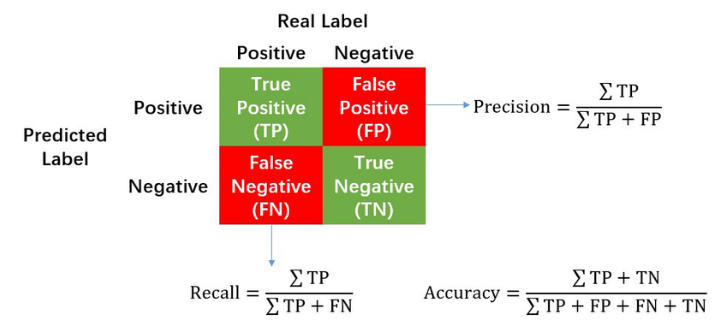

In [ ]:
cm = confusion_matrix(y_test, prediction_tree)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

# Randon Forest Train
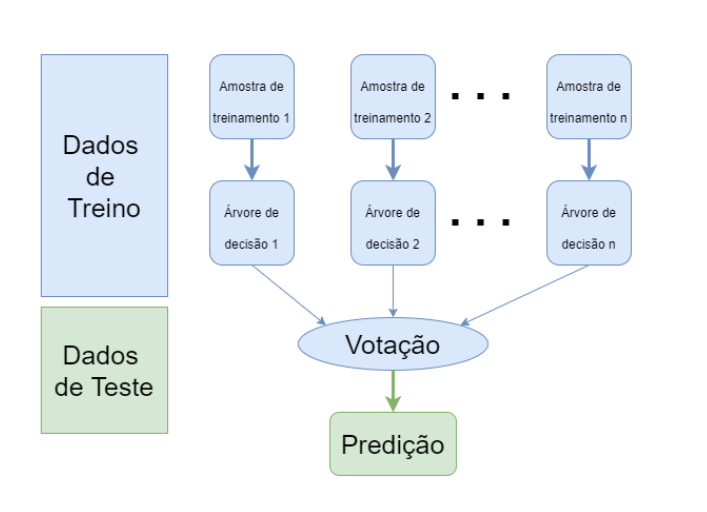

In [ ]:
SEED=42
randon_forest_train = RandomForestClassifier(max_depth= 5, random_state = SEED)

In [ ]:
model_rando_forest = randon_forest_train.fit(X_train, y_train)
prediction_rf_train = randon_forest_train.predict(X_train)

accuracy = accuracy_score(y_train, prediction_rf_train)
print('Valor Acuracia: ',accuracy)
print(classification_report(y_train, prediction_rf_train))

In [ ]:
cm = confusion_matrix(y_train, prediction_rf_train)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

# Randon Rorest Train

In [ ]:
prediction_rf = model_rando_forest.predict(X_test)

accuracy = accuracy_score(y_test, prediction_rf)
print('Valor Acuracia: ',accuracy)
print(classification_report(y_test, prediction_rf))

- Matrix Confusão Randon Forest

In [ ]:
cm = confusion_matrix(y_test, prediction_rf)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

# Logistic Regression Train

In [ ]:
lr = LogisticRegression(max_iter = 1000 ,random_state = 0)

In [ ]:
lr.fit(X_train, y_train)

In [ ]:
y_preds = lr.predict(X_train)

In [ ]:
y_accuracy = accuracy_score(y_train, y_preds)
print("Acurácia:", y_accuracy)

print(classification_report(y_train, y_preds))

In [ ]:
cm = confusion_matrix(y_train, y_preds)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Terá", "Não terá"])
disp.plot()

# GaussianNB Train

In [ ]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)

y_preds = gnb.predict(X_train)

In [ ]:
y_accuracy = accuracy_score(y_train, y_preds)
print("Acurácia:", y_accuracy)

print(classification_report(y_train, y_preds))

In [ ]:
cm = confusion_matrix(y_train, y_preds)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Terá", "Não terá"])
disp.plot()

# Cross-Validation

A escolha da validação cruzada correta depende do conjunto de dados com o qual você está lidando, e a escolha da validação cruzada em um conjunto de dados pode ou não se aplicar a outros conjuntos de dados. No entanto, existem alguns tipos de técnicas de validação cruzada que são as mais populares e amplamente utilizadas. Esses incluem:

- validação cruzada k-fold
- validação cruzada estratificada em k-fold A validação cruzada é dividir os dados de treinamento em algumas partes. Treinamos o modelo em algumas dessas peças e testamos nas demais

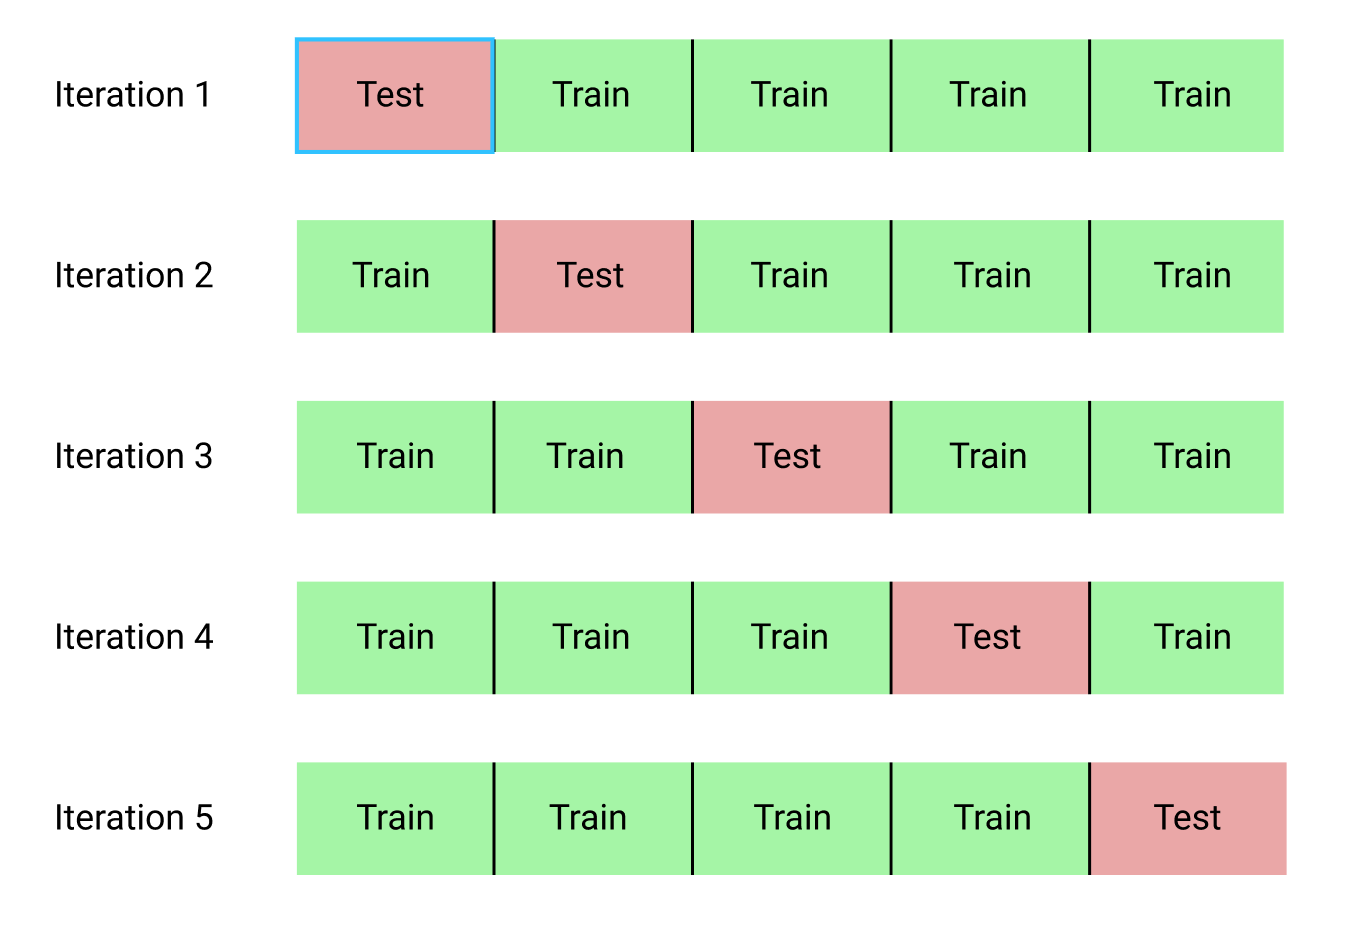



## Criação de objeto de classificadores

In [ ]:
classifiers = {'Arvore': DecisionTreeClassifier(random_state=0, max_depth=4),
               'Random Forest': RandomForestClassifier(max_depth= 5, random_state = SEED),
               'Naive Bayes': GaussianNB(),
               'Regressão Logistica': LogisticRegression(max_iter = 1000 ,random_state = 0),
              }

In [ ]:
for c in X_train.columns:
    if X_train[c].dtype == "object":
        X_train[c] = X_train[c].astype('category')
        X_train[c] = X_train[c].cat.codes

In [ ]:
for clf in classifiers.items():
    clf[1].fit(X_train, y_train)
    preds = clf[1].predict(X_test)
    score = accuracy_score(preds, y_test)
    print(f'\n------{clf[0]}------')
    print("Acurácia:",accuracy_score(y_test, preds))
    print("Precisão:",precision_score(y_test, preds))
    print("Recall:",recall_score(y_test, preds))
    print("F1:",f1_score(y_test, preds))

In [ ]:
preds = []
clf_trained = []
names=[]
for clf in classifiers.items():
    clf_atual = clf[1].fit(X_train, y_train)
    clf_trained.append(clf_atual)

    pred_atual=clf[1].predict(X_test)
    preds.append(pred_atual)
    names.append(clf[0])
    
    print(precision_recall_fscore_support(y_test, pred_atual, average='macro'))

In [ ]:
fig, axs =  plt.subplots(2, 2, figsize=(15, 10))
position = [axs[0,0],axs[0,1],axs[1,0],axs[1,1]]

for i in range(len(classifiers)):
    cm = confusion_matrix(y_test, preds[i], labels=clf_trained[i].classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf_trained[i].classes_)
    position[i].set_title(names[i])
    disp.plot(ax=position[i])
    
plt.show()

In [ ]:
ax = plt.gca()
for i in range(len(classifiers)):
    clf = classifiers[names[i]]      
    rfc_disp = RocCurveDisplay.from_estimator(clf, X_test, y_test, ax=ax, alpha=0.8)

clf2 = classifiers['Random Forest']
svc_disp = RocCurveDisplay.from_estimator(clf2, X_test, y_test)
svc_disp.plot(ax=ax, alpha=0.8)
plt.show()